In [1]:
from utils import (
                BaseForecaster, 
                ResidualForecaster,
                TimeSeriesPreprocessor,
                crps,
                HistoricalForecaster
)
from plotting_utils import (
                get_validation_series,
                make_plots,
                make_crps_seq_plot,
                make_crps_strip_plot,
                make_rmse_strip_plot,
)
import os
import time
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
targets = pd.read_csv("targets.csv.gz")

In [70]:
data_preprocessor = TimeSeriesPreprocessor()
data_preprocessor.load("FLNT")

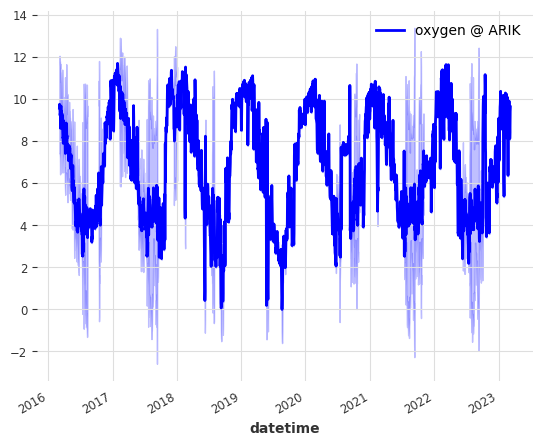

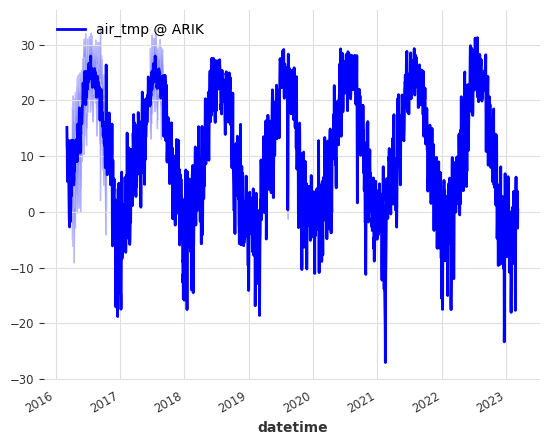

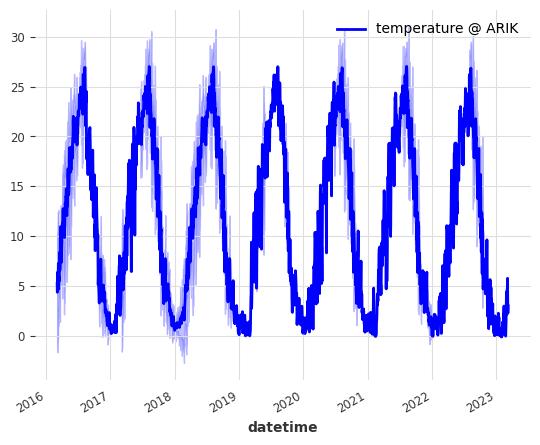

In [75]:
site = "ARIK"
data_preprocessor.load(site)
data_preprocessor.plot_by_site(site)

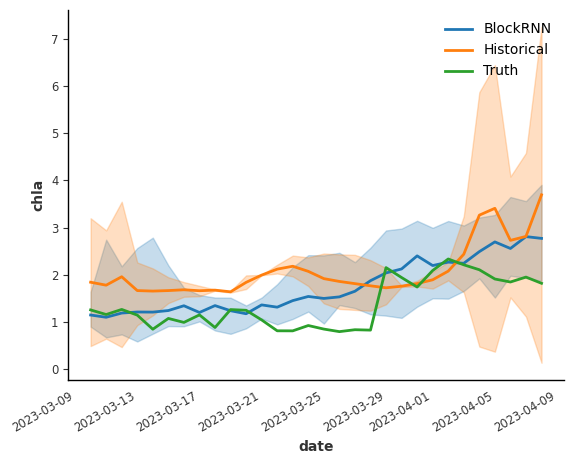

In [5]:
models = ["BlockRNN"]
args = [models, targets, "FLNT", "chla"]
make_plots(*args)

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


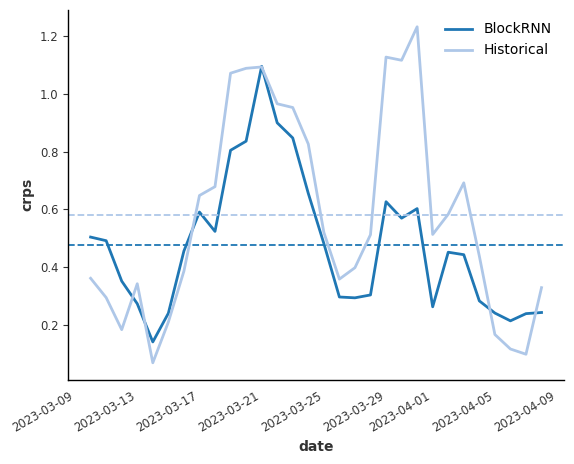

In [6]:
make_crps_seq_plot(*args)

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

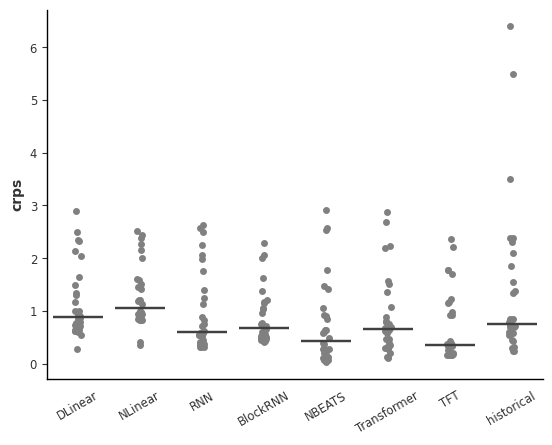

In [35]:
models = ["DLinear", "NLinear", "RNN"] + ["BlockRNN", "NBEATS", "Transformer", "TFT"]
args = [models, targets, "FLNT", "temperature"]
scores_dict = make_crps_strip_plot(*args)

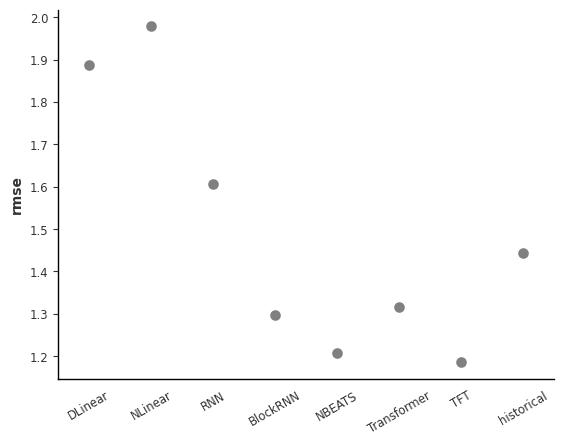

In [36]:
make_rmse_strip_plot(*args)

In [9]:
targets[targets.site_id == "FLNT"][targets.datetime == "2023-03-13"]

/tmp/ipykernel_1288599/4165605272.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  targets[targets.site_id == "FLNT"][targets.datetime == "2023-03-13"]


,datetime,site_id,chla,oxygen,temperature,air_tmp
19305,2023-03-13,FLNT,1.147571,8.089143,19.985497,15.051424


> /home/rstudio/neon4cast-darts/plotting_utils.py(80)make_plots()
     78     historical_model.forecast_ts.plot(label="Historical", color=colors[i])
     79     import pdb; pdb.set_trace()
---> 80     validation_series.plot(label="Truth", color=colors[i+1])
     81     x = plt.xlabel("date")
     82     y = plt.ylabel(target_variable)



ipdb>  c


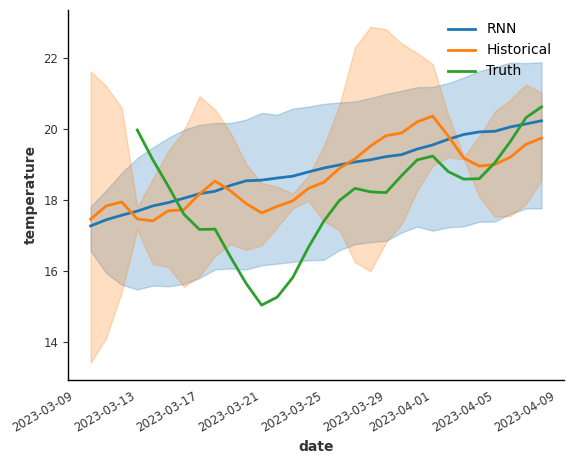

In [10]:
models = ["RNN"]
args = [models, targets, "FLNT", "temperature"]
make_plots(*args)

In [4]:
from darts import TimeSeries

Now going to work on making a RMSE plot

In [13]:
from darts.metrics import rmse
from utils import (
                BaseForecaster, 
                ResidualForecaster,
                TimeSeriesPreprocessor,
                crps,
                HistoricalForecaster
)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from darts import TimeSeries
import numpy as np
import CRPS.CRPS as forecastscore
import matplotlib as mpl
import pdb

Exploring gaussian vs quantile vs dropout regression. Issue is that not all models host this. Also try with TCN. Maybe this is relevant to the model used.

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

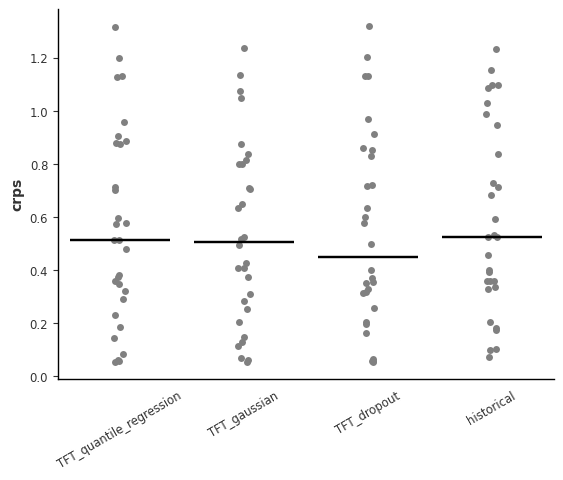

In [30]:
models = ["TFT_quantile_regression", "TFT_gaussian", "TFT_dropout"]
args = [models, targets, "FLNT", "oxygen"]
make_crps_strip_plot(*args, plot_name="gaussian_v_quantile_v_dropout")

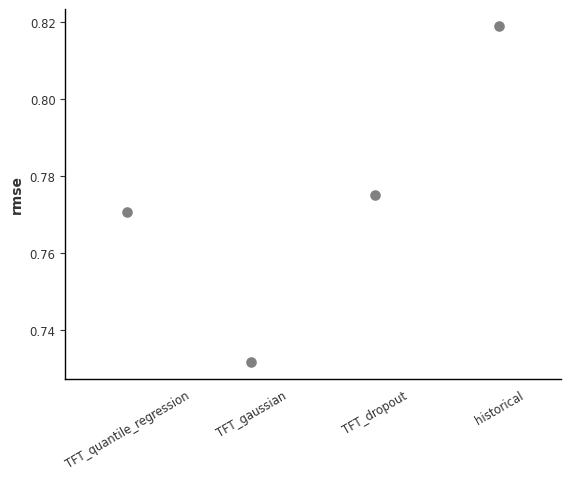

In [31]:
make_rmse_strip_plot(*args, plot_name="gaussian_v_quantile_v_dropout_rmse")

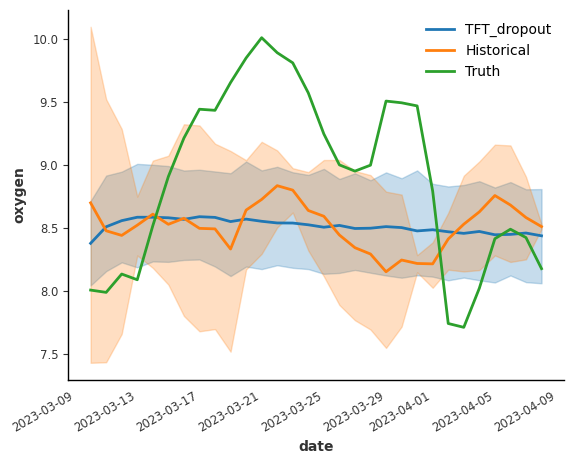

In [32]:
models = ["TFT_dropout"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

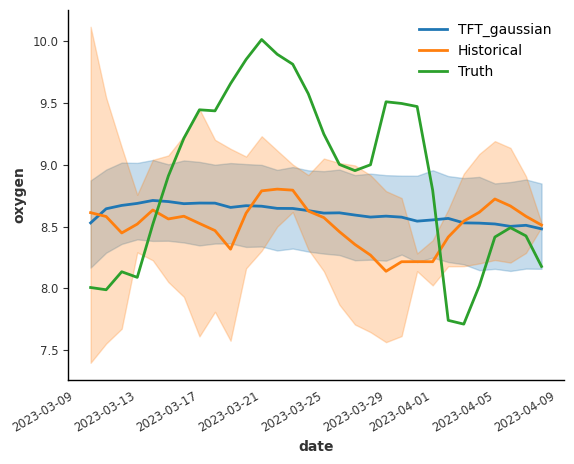

In [33]:
models = ["TFT_gaussian"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

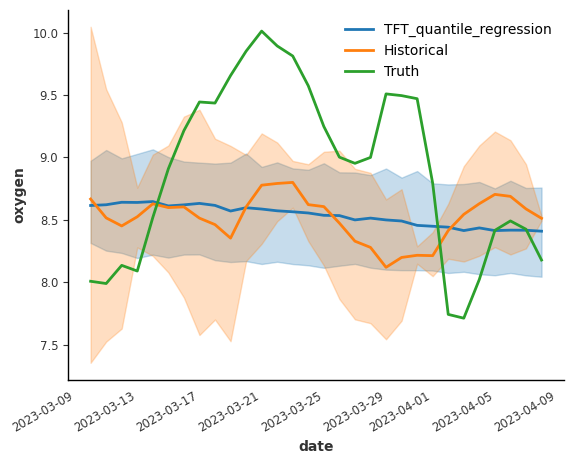

In [34]:
models = ["TFT_quantile_regression"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

Now trying with TCN

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

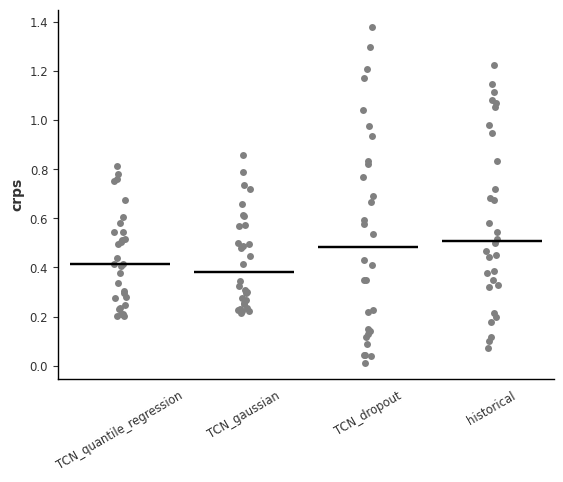

In [35]:
models = ["TCN_quantile_regression", "TCN_gaussian", "TCN_dropout"]
args = [models, targets, "FLNT", "oxygen"]
make_crps_strip_plot(*args, plot_name="gaussian_v_quantile_v_dropout_TCN")

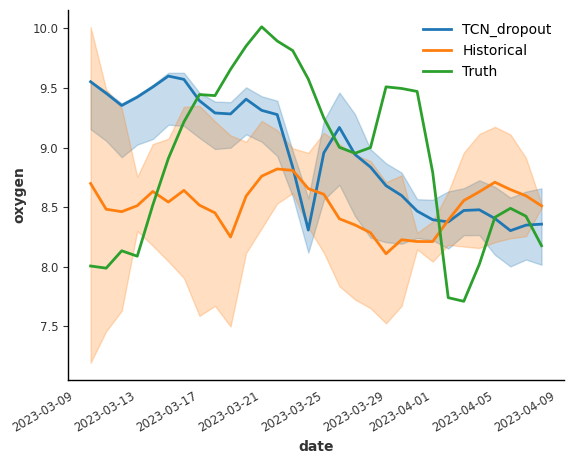

In [36]:
models = ["TCN_dropout"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

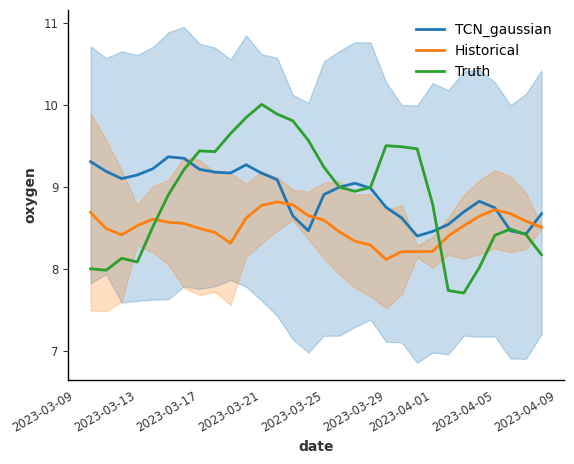

In [37]:
models = ["TCN_gaussian"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

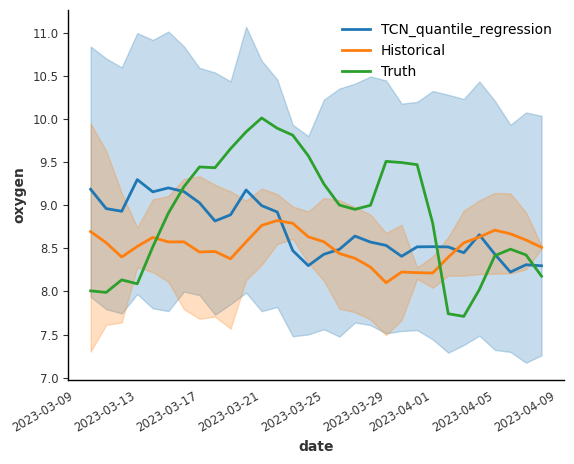

In [38]:
models = ["TCN_quantile_regression"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

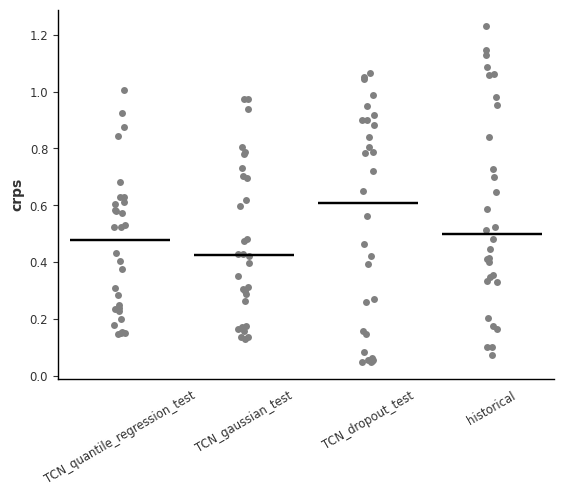

In [43]:
models = ["TCN_quantile_regression_test", "TCN_gaussian_test", "TCN_dropout_test"]
args = [models, targets, "FLNT", "oxygen"]
make_crps_strip_plot(*args)

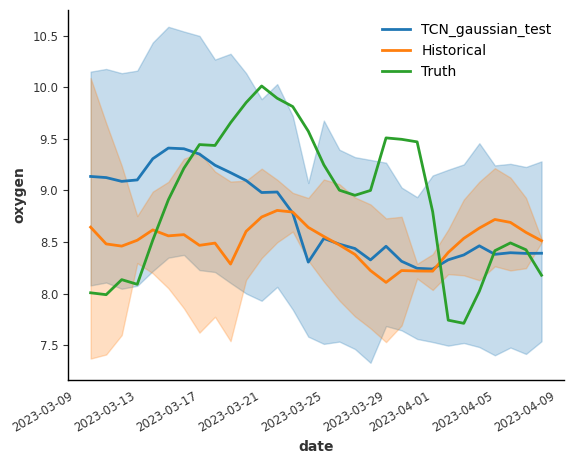

In [45]:
models = ["TCN_gaussian_test"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

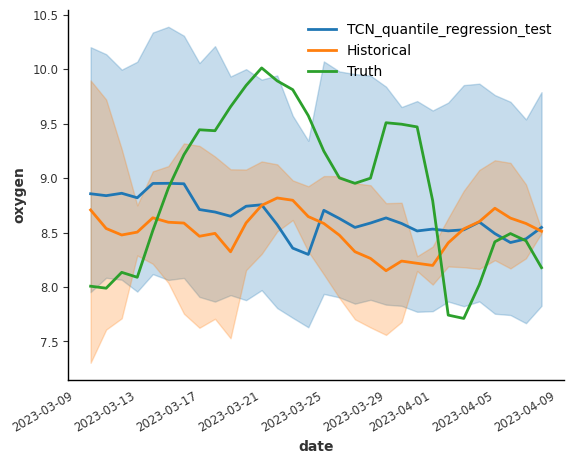

In [46]:
models = ["TCN_quantile_regression_test"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

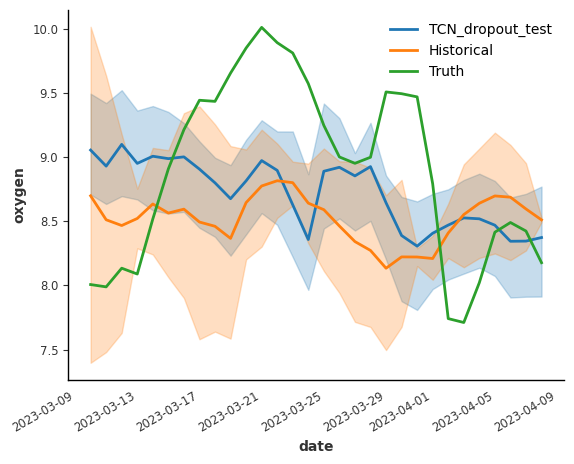

In [47]:
models = ["TCN_dropout_test"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

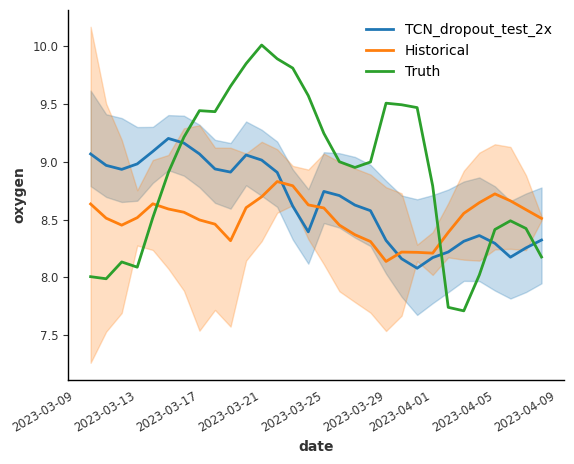

In [48]:
models = ["TCN_dropout_test_2x"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

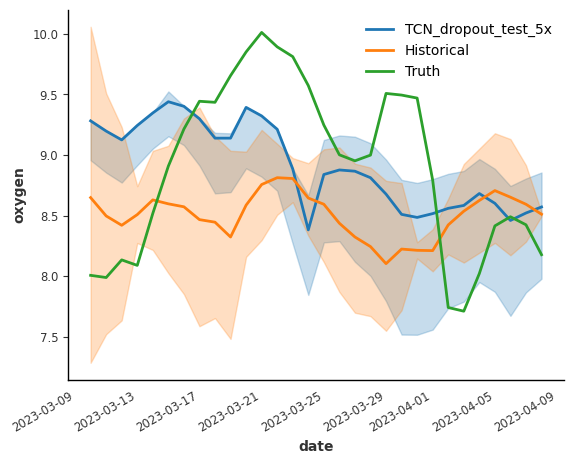

In [49]:
models = ["TCN_dropout_test_5x"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

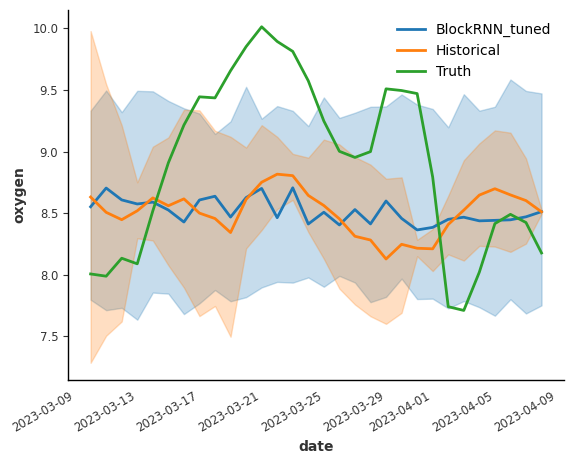

In [50]:
models = ["BlockRNN_tuned"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

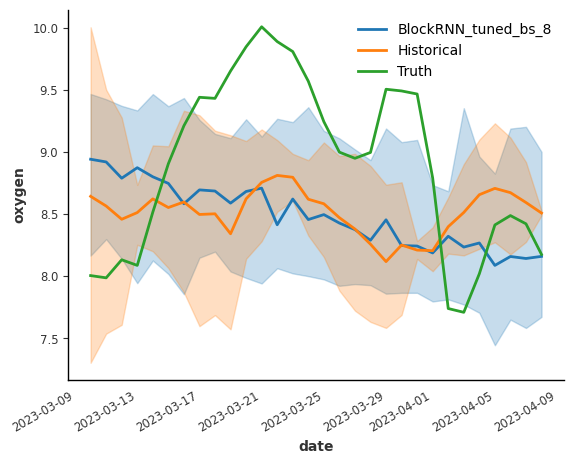

In [51]:
models = ["BlockRNN_tuned_bs_8"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_plots(*solo_args)

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


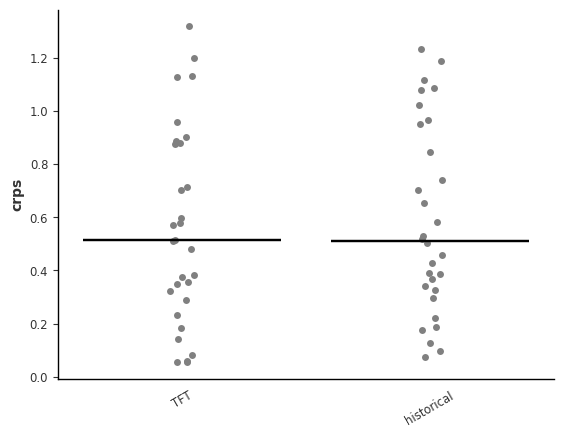

In [66]:
models = ["TFT"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_crps_strip_plot(*solo_args)

Now making a function to do a crps strip plot across sites

In [4]:
from darts.metrics import rmse
from utils import (
                BaseForecaster, 
                ResidualForecaster,
                TimeSeriesPreprocessor,
                crps,
                HistoricalForecaster
)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from darts import TimeSeries
import numpy as np
import CRPS.CRPS as forecastscore
import matplotlib as mpl
import pdb

In [69]:
x = "BlockRNN" + ""

'BlockRNN'

In [109]:
import warnings

# Filter out the specific Darts warning
warnings.filterwarnings("default")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

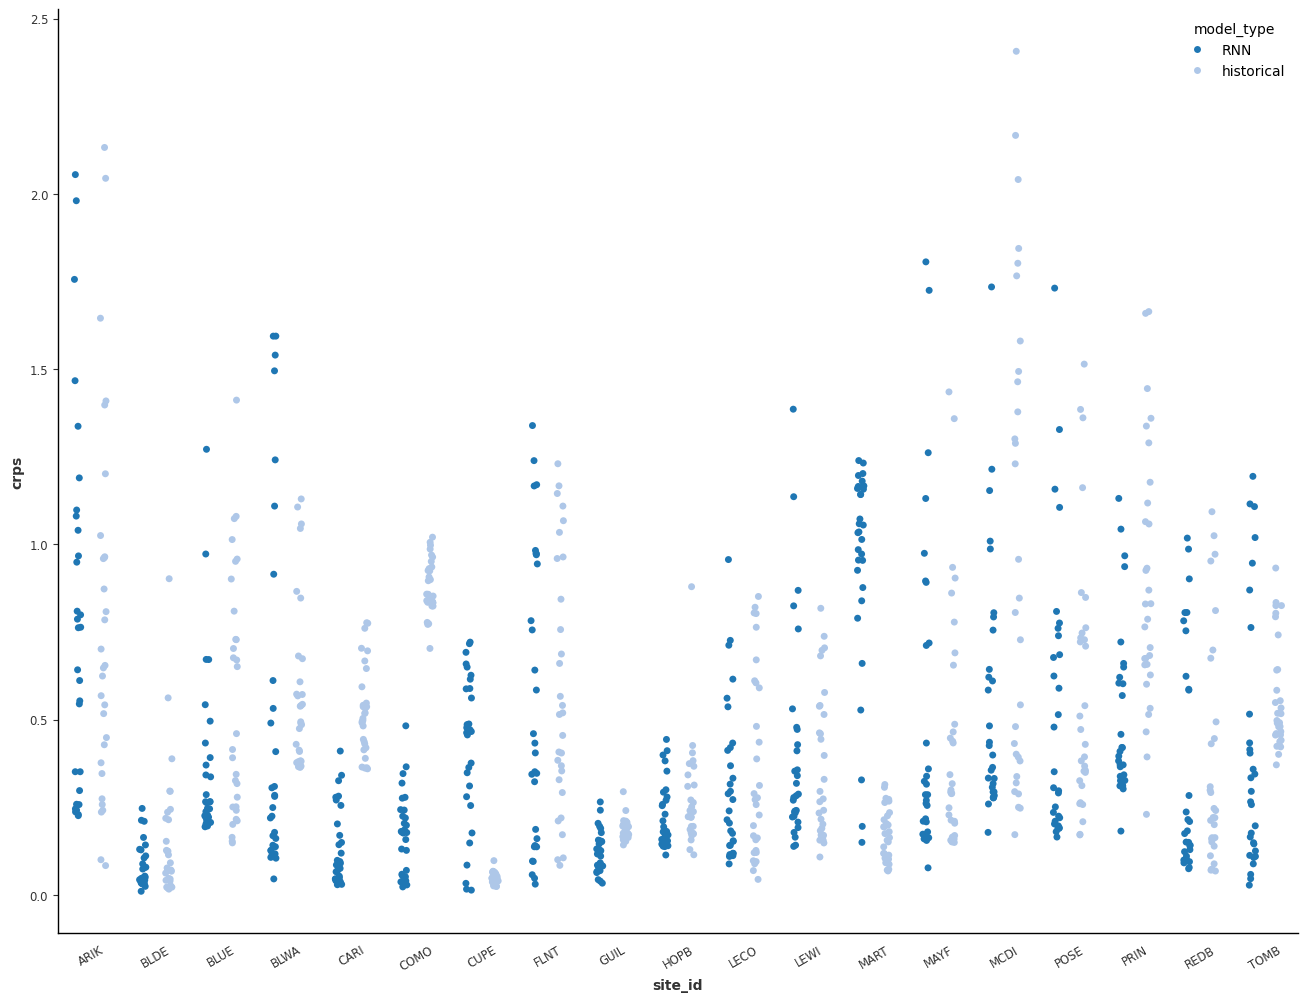

In [84]:
make_crps_strip_plot_bysite("RNN", targets, "oxygen", suffix="_default")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

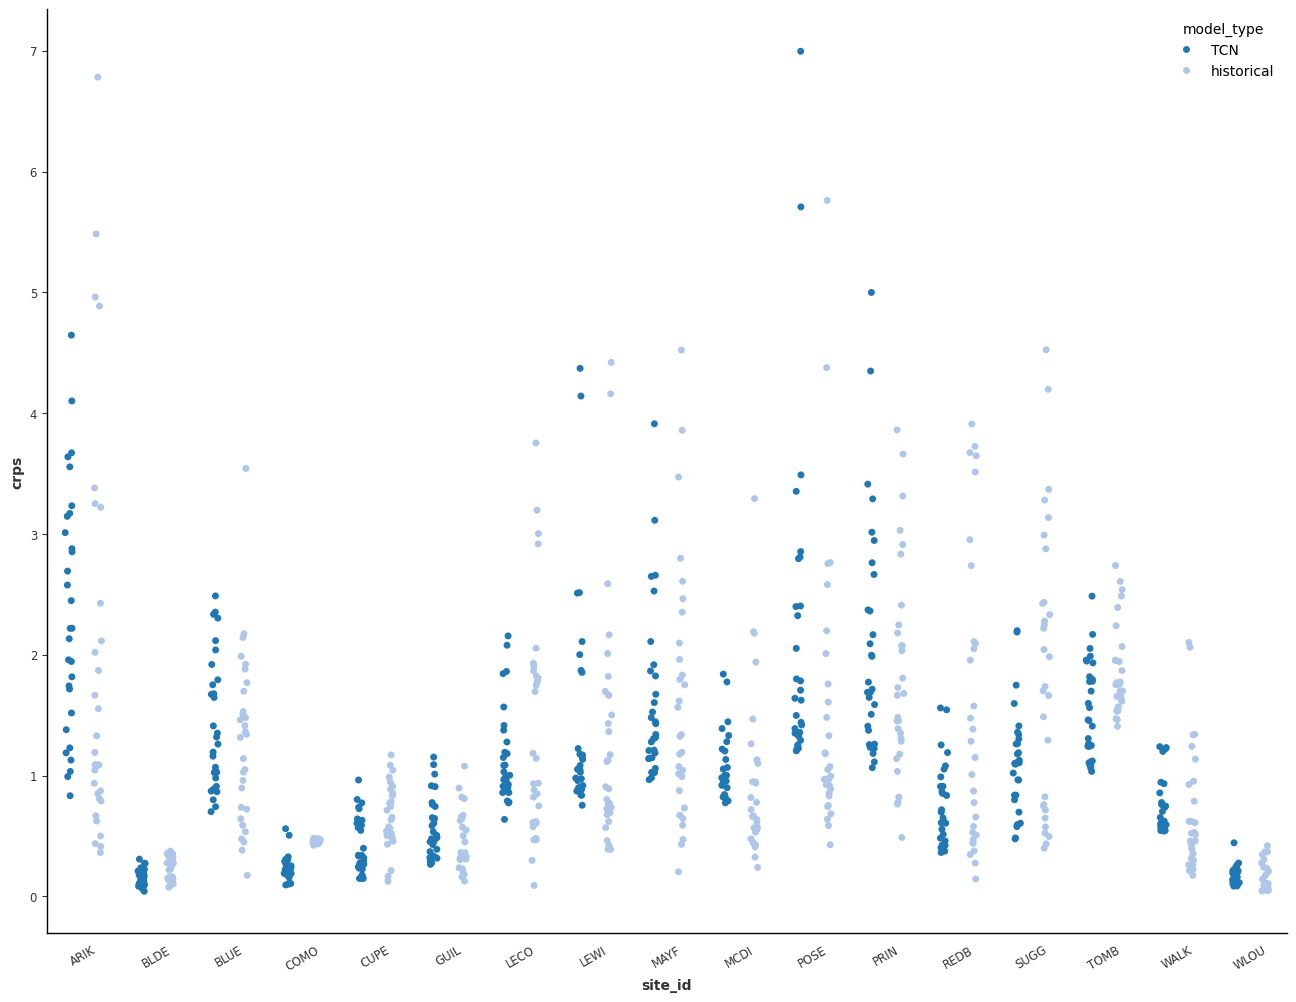

In [86]:
make_crps_strip_plot_bysite("TCN", targets, "temperature", suffix="_default")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

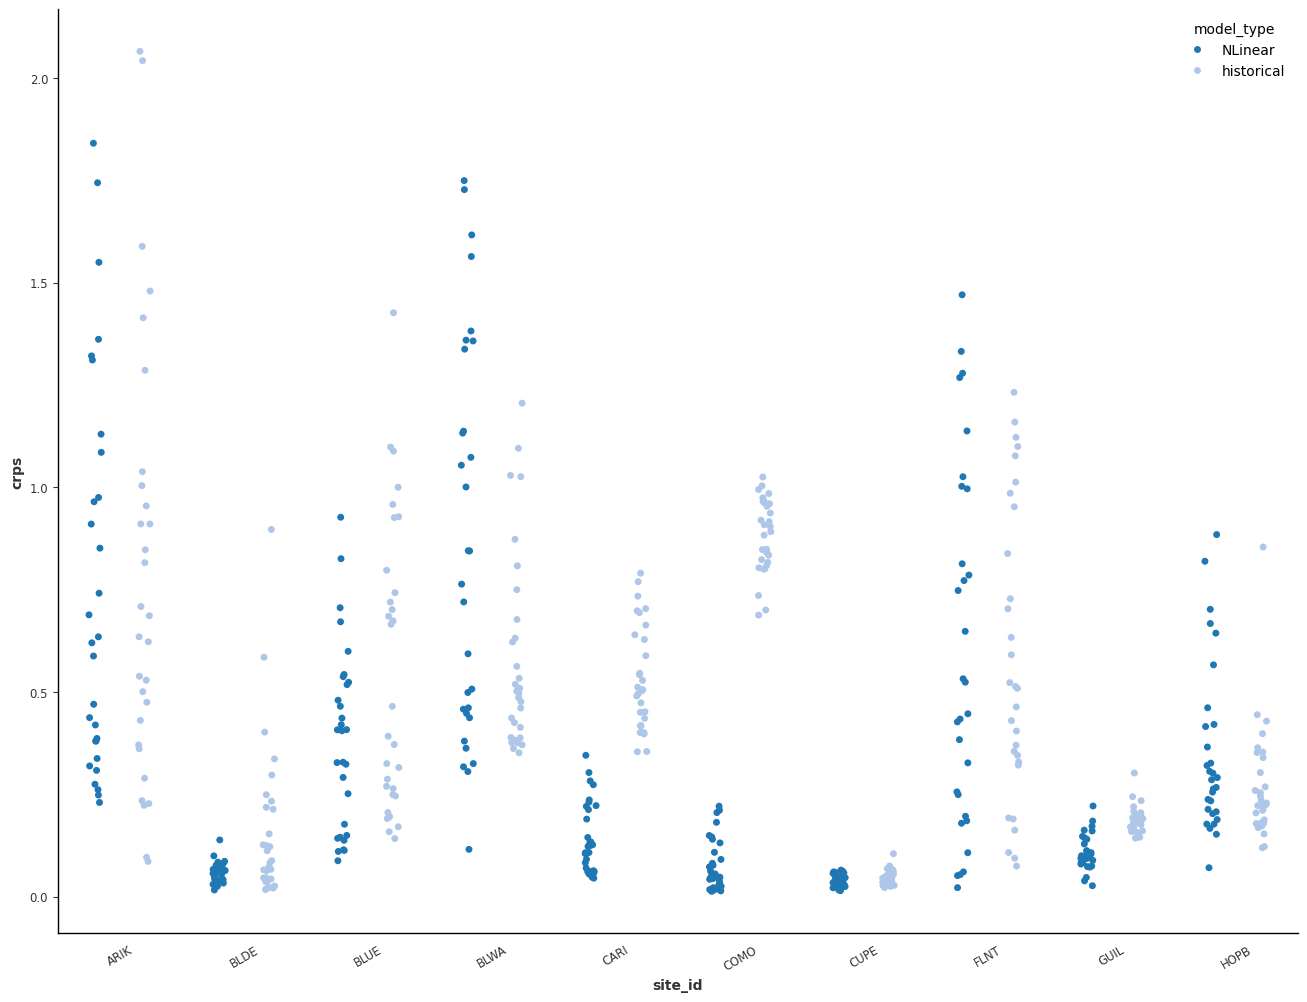

In [77]:
make_crps_strip_plot_bysite("NLinear", targets, "oxygen", suffix="_default")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

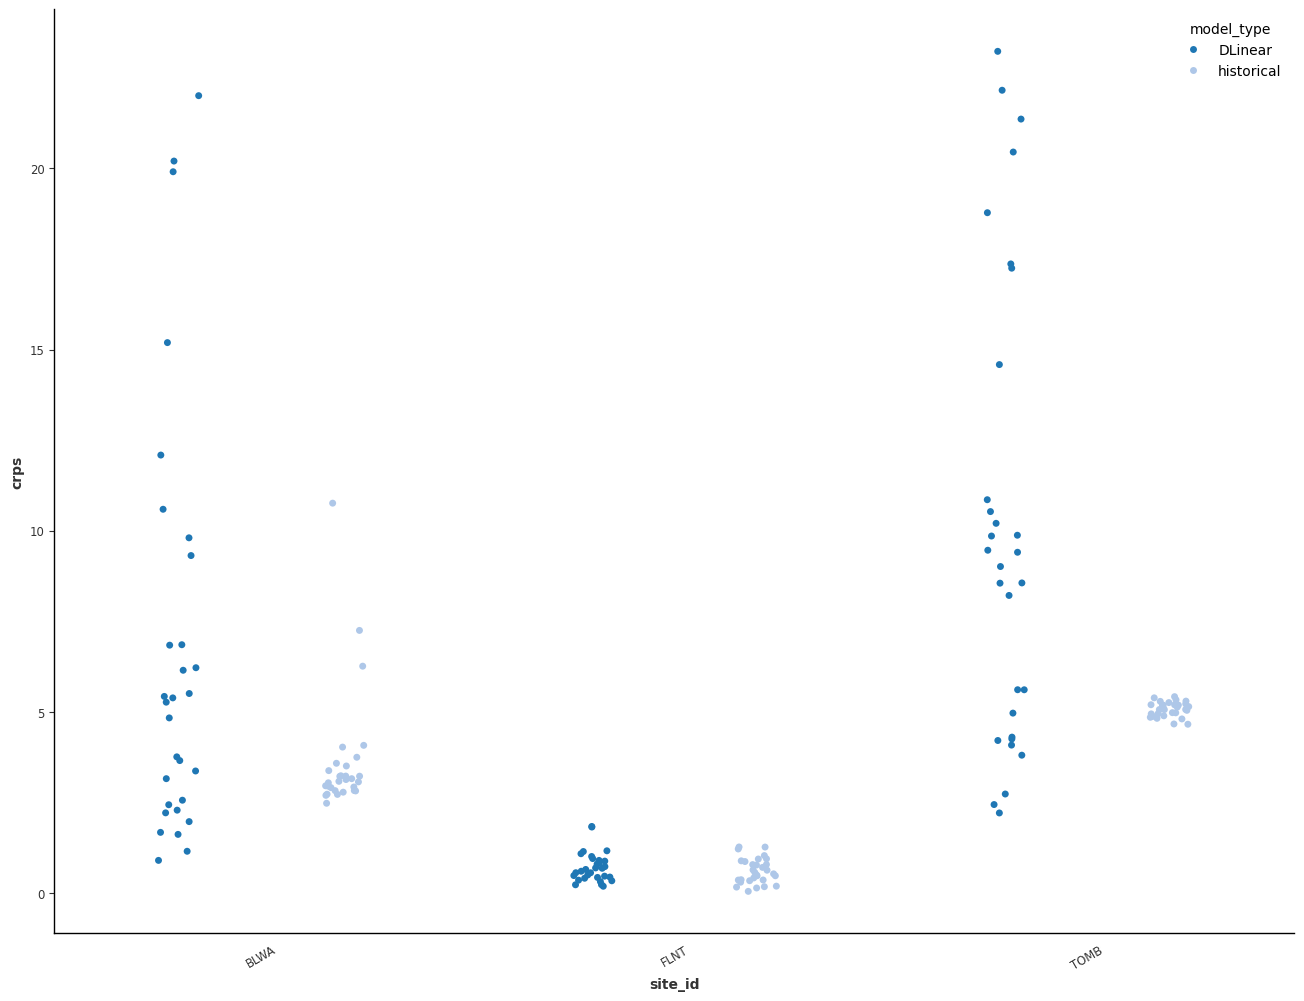

In [89]:
make_crps_strip_plot_bysite("DLinear", targets, "chla", suffix="_default")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

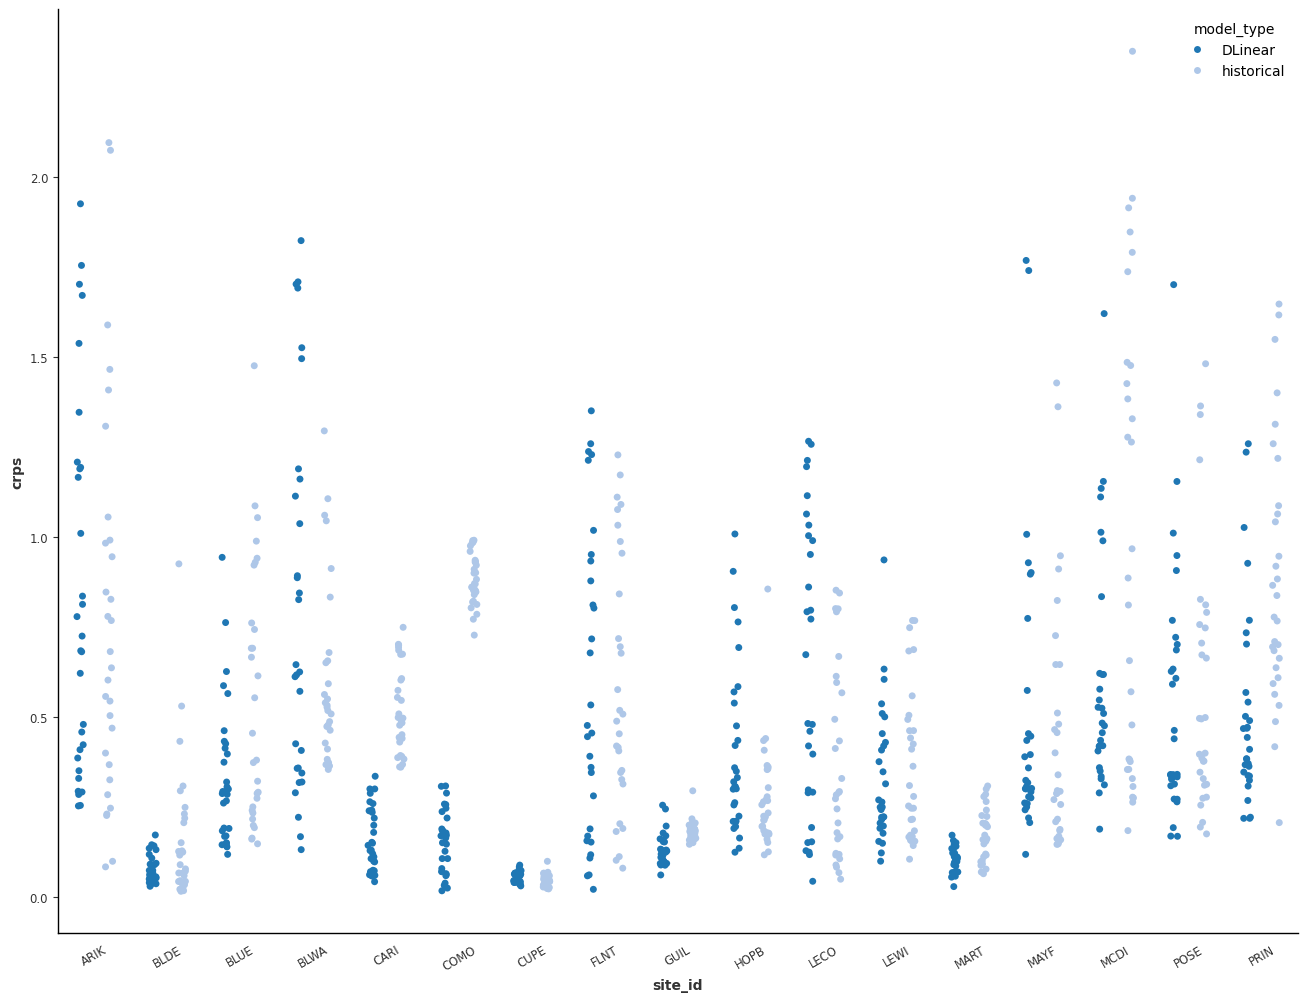

In [69]:
make_crps_strip_plot_bysite("DLinear", targets, "oxygen", suffix="_default")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

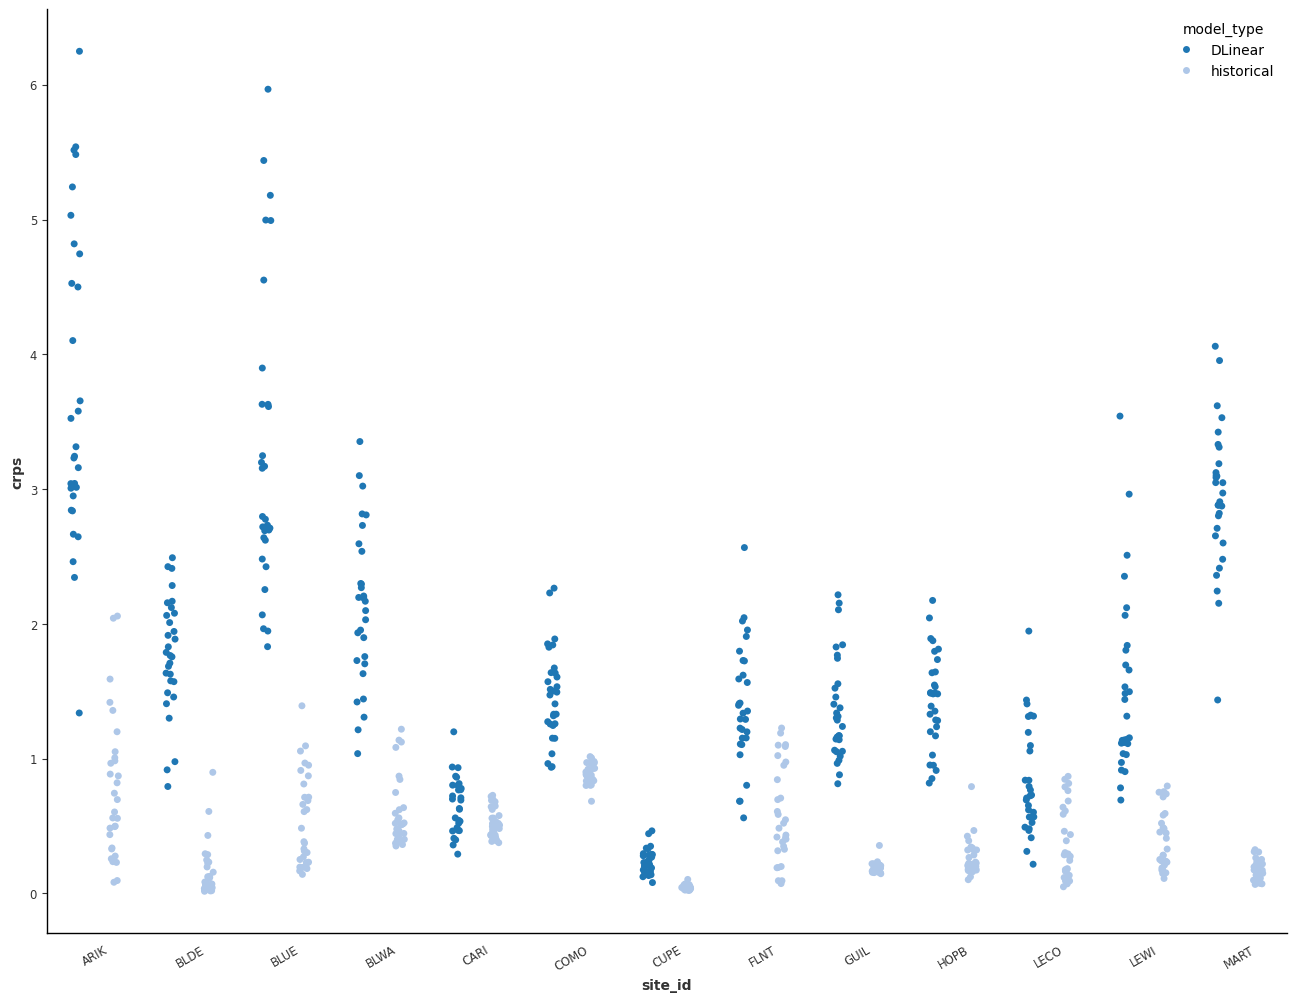

In [22]:
make_crps_strip_plot_bysite("DLinear", targets, "oxygen", suffix="_test")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


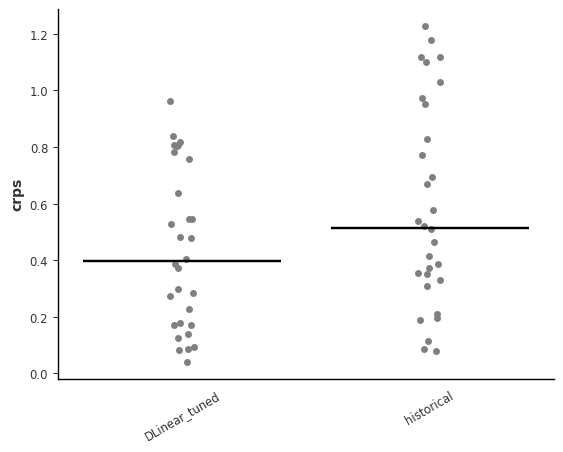

In [58]:
site_id = "FLNT"
models = ["DLinear_tuned"]
solo_args = [models, targets, site_id, "oxygen"]
make_crps_strip_plot(*solo_args)

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


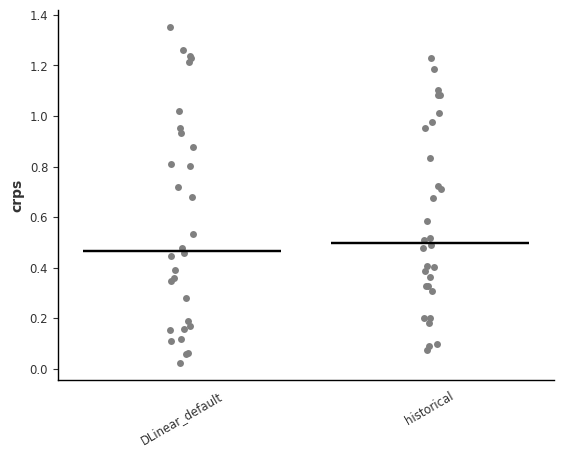

In [59]:
models = ["DLinear_default"]
solo_args = [models, targets, site_id, "oxygen"]
make_crps_strip_plot(*solo_args)

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


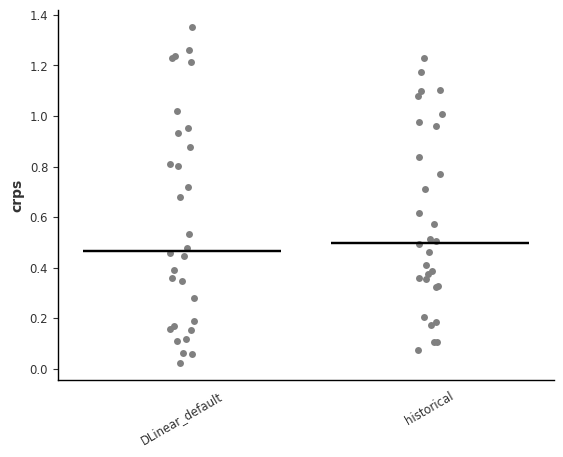

In [38]:
models = ["DLinear_untuned"]
solo_args = [models, targets, "FLNT", "oxygen"]
make_crps_strip_plot(*solo_args)

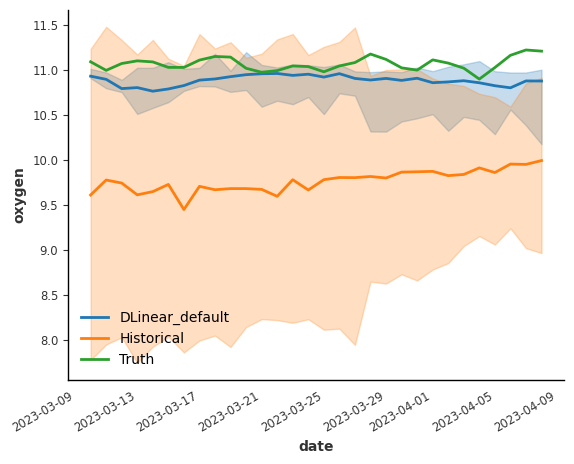

In [88]:
models = ["DLinear_default"]
solo_args = [models, targets, "COMO", "oxygen"]
make_plots(*solo_args)

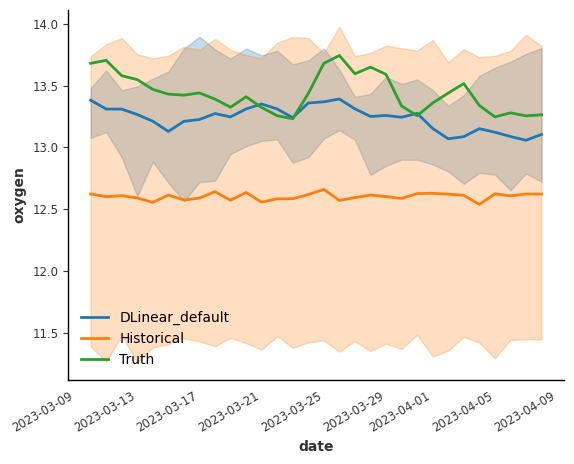

In [66]:
models = ["DLinear_default"]
solo_args = [models, targets, "CARI", "oxygen"]
make_plots(*solo_args)

In [16]:
def get_validation_series(targets_df, site_id, target_variable, date, forecast_horizon):
        # Being careful here with the date, note that I am matching the forecast,
        # so I don't need to advance.
        date_range = pd.date_range(date, 
                                   periods=forecast_horizon, 
                                   freq='D')
        # Filter targets df for site and variable
        site_df = targets_df[targets_df["site_id"] == site_id]
        site_var_df_ = site_df[["datetime", target_variable]]
        site_var_df = site_var_df_.copy()
        site_var_df["datetime"] = pd.to_datetime(site_var_df_["datetime"])
        validation_df = pd.DataFrame()
        # Now creating a new dataframe of observed series from the forecast
        # window
        for date in date_range:
            entry = site_var_df[site_var_df.datetime == date]
            validation_df = pd.concat([validation_df, entry], 
                                      axis=0).reset_index(drop=True)

        times = pd.to_datetime(validation_df.datetime)
        times = pd.DatetimeIndex(times)
        validation_series = TimeSeries.from_times_and_values(times,
                                                             validation_df[[target_variable]],
                                                             fill_missing_dates=True,
                                                             freq="D")
        
        return validation_series

In [17]:
def make_crps_strip_plot_bysite(model, targets_df, target_variable, suffix="", plot_name=None):

    plt.figure(figsize=(16, 12))
    score_dict = {}
    
    for site_id in targets_df.site_id.unique():
        score_dict[site_id] = []
        file = model + suffix
        csv_name = f"forecasts/{site_id}/{target_variable}/{file}"
        try:
            df = pd.read_csv(f"{csv_name}.csv")
        except:
            del score_dict[site_id]
            continue
        times = pd.to_datetime(df["datetime"])
        times = pd.DatetimeIndex(times)
        values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((len(times), 1, -1))
        model_forecast = TimeSeries.from_times_and_values(times, 
                                                          values, 
                                                          fill_missing_dates=True, freq="D")

        # Getting the validation set from targets
        date = model_forecast.time_index[0]
        forecast_horizon = len(model_forecast)
        validation_series = get_validation_series(targets_df, 
                                                  site_id, 
                                                  target_variable, 
                                                  date, 
                                                  forecast_horizon,
                                                 ).pd_series().values
    
        # Computing CRPS and plotting it as well as its mean (dashed)
        try:
            if np.isnan(validation_series).any():
                del score_dict[site_id]
                continue
            scores = crps(model_forecast, validation_series)
        except:
            del score_dict[site_id]
            continue
        score_dict[site_id] = {"forecast_crps": scores.pd_dataframe().values[:, 0]}



        
        # Now, making the forecast based off of historical mean and std
        historical_model = HistoricalForecaster(targets=targets_df,
                              site_id=site_id,
                              target_variable=target_variable,
                              output_csv_name=None,
                              validation_split_date=str(model_forecast.time_index[0])[:10],
                              forecast_horizon=len(model_forecast),)
        # Computing CRPS of historical forecast and plotting
        historical_model.make_forecasts()
        
        scores = crps(historical_model.forecast_ts, validation_series)
        score_dict[site_id]["historical_crps"] = scores.pd_dataframe().values[:, 0]

    score_df = pd.DataFrame([(site_id, data_dict['forecast_crps'][i], data_dict['historical_crps'][i]) \
                                 for site_id, data_dict in score_dict.items() \
                                 for i in range(len(data_dict['forecast_crps']))],
                            columns=["site_id", f'{model}', 'historical'])
    score_df = pd.melt(score_df, id_vars=["site_id"], var_name="model_type", value_name="crps")

    # Now creating the plot
    p = sns.stripplot(score_df, x="site_id", y="crps", hue="model_type", dodge=True, palette="tab20")

    # plot the mean line
    sns.boxplot(showmeans=False,
                meanline=False,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2},
                medianprops={'visible': True, 'lw':1.75},
                whiskerprops={'visible': False},
                zorder=10,
                data=score_dict,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=p)
    plt.grid(False)
    plt.ylabel("crps")
    ax = plt.gca()
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    plt.xticks(rotation=30)
    
    # Saving the plot if desired
    if plot_name != None:
        if not os.path.exists(f"plots/{site_id}/{target_variable}/"):
            os.makedirs(f"plots/{site_id}/{target_variable}/")
        plt.savefig(f"plots/{site_id}/{target_variable}/{plot_name}")